### Relationship between the Number of Hospitals and Population Size

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
import matplotlib as mpl

### Fetching Data

In [2]:
pop_fips_area = pd.read_csv("../Results/Map/merge_pop_fips_area.csv")
pop_fips_area.head()

,Unnamed: 0,State,County,Deaths,Population,Crude Rate,Age Adjusted Rate,% of Total Deaths,FIPS,Areaname,Land Area (Square Miles),Population per Square Mile
0,0,AK,Aleutians East,12,3296,Unreliable,Unreliable,0.00%,2013,"Aleutians East, AK",6981.94,0.472075
1,1,AK,Aleutians West,22,5647,389.59,594.32,0.00%,2016,"Aleutians West, AK",4390.28,1.286251
2,2,AK,Anchorage,1724,298192,578.15,717.44,0.06%,2020,"Anchorage, AK",1704.68,174.925499
3,3,AK,Bethel,122,17968,678.98,1146.51,0.00%,2050,"Bethel, AK",40570.00,0.442889
4,4,AK,Bristol Bay,Suppressed,898,Suppressed,Suppressed,Suppressed,2060,"Bristol Bay, AK",503.84,1.782312


In [3]:
hospital_survey_fips = pd.read_csv("../Results/Map/merge_survey_fips.csv")
hospital_survey_fips.head()

,Unnamed: 0,State,County,Hospital,Number of Completed Surveys,FIPS
0,0,AK,Anchorage,3.0,3675.0,2020
1,1,AK,Bethel,1.0,265.0,2050
2,2,AK,Fairbanks North Star,1.0,666.0,2090
3,3,AK,Juneau,1.0,270.0,2110
4,4,AK,Ketchikan Gateway,1.0,123.0,2130


In [4]:
pop_hospital = pd.merge(pop_fips_area, hospital_survey_fips, on = "FIPS", how = "left")
pop_hospital = pop_hospital[['State_x', 'County_x', 'Deaths', 'Population',
       'Crude Rate', 'Age Adjusted Rate', '% of Total Deaths', 'FIPS',
       'Areaname', 'Land Area (Square Miles)', 'Population per Square Mile',
       'Hospital','Number of Completed Surveys']]
pop_hospital.head()

,State_x,County_x,Deaths,Population,Crude Rate,Age Adjusted Rate,% of Total Deaths,FIPS,Areaname,Land Area (Square Miles),Population per Square Mile,Hospital,Number of Completed Surveys
0,AK,Aleutians East,12,3296,Unreliable,Unreliable,0.00%,2013,"Aleutians East, AK",6981.94,0.472075,0.0,0.0
1,AK,Aleutians West,22,5647,389.59,594.32,0.00%,2016,"Aleutians West, AK",4390.28,1.286251,0.0,0.0
2,AK,Anchorage,1724,298192,578.15,717.44,0.06%,2020,"Anchorage, AK",1704.68,174.925499,3.0,3675.0
3,AK,Bethel,122,17968,678.98,1146.51,0.00%,2050,"Bethel, AK",40570.00,0.442889,1.0,265.0
4,AK,Bristol Bay,Suppressed,898,Suppressed,Suppressed,Suppressed,2060,"Bristol Bay, AK",503.84,1.782312,0.0,0.0


### Visualization

In [5]:
# Calculate regression statistics
slope, intercept, r_value, p_value, std_err = stats.linregress(
    x=pop_hospital["Population"] / 1000000, y=pop_hospital["Hospital"])

labels = ["Regression statistics", f"slope = {slope:.2f}", f"intercept = {intercept:.2f}", 
          f"p value = {p_value:.2f}", f"R squared = {r_value**2:.2f}"]
posx = [11,11,11,11,11]
posy = [82,72,64,56,48]
fontsizes = [13,12,12,12,12]

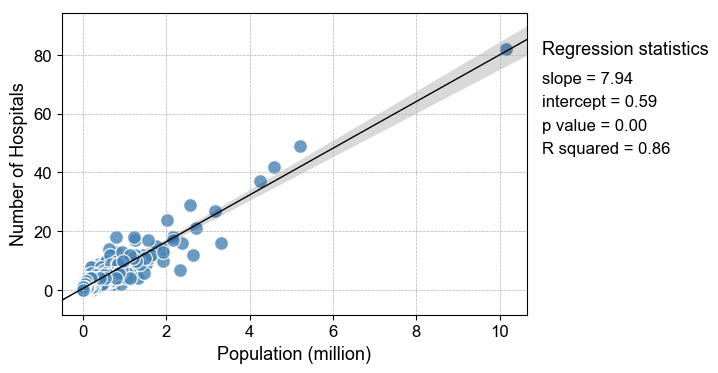

In [6]:
# Plot
mpl.rcParams['figure.dpi']= 100
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['Arial']
font_size = 13
market_size = 100
line_width = 1

sns.regplot(pop_hospital["Population"] / 1000000, pop_hospital["Hospital"], 
           scatter_kws={"s": market_size, "facecolor": 'steelblue', 
                        "edgecolors": 'w', "linewidth": line_width},
           line_kws={"color": 'k', "linewidth": line_width})

plt.xlabel('Population (million)', fontsize = font_size)
plt.ylabel('Number of Hospitals', fontsize = font_size)
plt.tick_params(labelsize=font_size-1)
plt.grid(linestyle='--', linewidth=0.5)

for i in range(len(posx)):
    plt.text(posx[i], posy[i], labels[i], ha='left', va='center', color='k', fontsize = fontsizes[i])
    
plt.savefig('../Results/hospitals_vs_population.png', bbox_inches="tight", dpi = 300)